# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from scipy.io import arff

from algo_implementation import logistic_regression
from preprocessor import Preprocessor

# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt


# Dataset 1 preparation

## Preprocessing

In [3]:
def decode_bytes(x):
    """
    Function for decoding bytes-type data 
    """
    if isinstance(x, bytes):
        return x.decode()
    else:
        return x

In [4]:
preprocessor = Preprocessor()
preprocessor.remove_spaces('chronic_kidney_disease.arff', 'chronic_kidney_disease2.arff')

data, meta = arff.loadarff('chronic_kidney_disease2.arff')
dataset1 = pd.DataFrame(data)
dataset1 = dataset1.applymap(decode_bytes)
dataset1 = dataset1.replace('?', np.nan)

categorical_cols, numerical_cols = preprocessor.get_cat_num_colnames(dataset1)



In [5]:
processed_data = preprocessor.data_preprocess(dataset1, categorical_cols, numerical_cols)
X, y = processed_data.iloc[:, :-1], processed_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

## Colinearity detection

### VIF

In [14]:
p = Preprocessor()
vif_coefs = p.vif(X_train.drop('su_0', axis=1))
vif_coefs[vif_coefs['VIF'] >= 7]

c:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
16,su_nan,15.7396
17,al_0,inf
18,al_1,inf
19,al_2,inf
20,al_3,inf
21,al_4,inf
23,al_nan,inf
24,sg_1.005,inf
25,sg_1.010,inf
26,sg_1.015,inf


### Correlation

In [7]:
corr_matrix = X_train.corr()
corr_matrix



,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,...,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
age,1.000000,0.152199,0.236323,0.195399,0.140063,-0.069579,0.043421,-0.184362,-0.187031,0.096293,...,-0.037435,-0.132410,0.169893,0.060294,0.395772,0.407300,0.237916,0.143978,0.108481,0.045511
bp,0.152199,1.000000,0.206005,0.146520,0.111594,-0.105270,0.071787,-0.263191,-0.302335,0.010160,...,-0.119272,-0.140634,0.064362,0.060926,0.275136,0.233867,0.065825,0.167141,0.028995,0.164663
bgr,0.236323,0.206005,1.000000,0.140690,0.102463,-0.148187,0.071314,-0.291373,-0.280311,0.100490,...,-0.189727,-0.277872,0.197297,0.054702,0.364005,0.505440,0.230908,0.229730,0.091880,0.141118
bu,0.195399,0.146520,0.140690,1.000000,0.573234,-0.284353,0.371213,-0.517756,-0.498231,0.067299,...,-0.158330,-0.345455,0.202964,0.124102,0.335019,0.303527,0.174674,0.257183,0.319522,0.400471
sc,0.140063,0.111594,0.102463,0.573234,1.000000,-0.641833,0.219745,-0.313843,-0.314718,-0.014338,...,-0.085235,-0.148174,0.051734,0.040131,0.263962,0.198009,0.203710,0.156525,0.161721,0.198469
sod,-0.069579,-0.105270,-0.148187,-0.284353,-0.641833,1.000000,0.075369,0.321203,0.329839,0.015646,...,0.111963,0.155426,-0.131046,-0.063453,-0.298546,-0.283913,-0.231388,-0.153113,-0.149995,-0.182446
pot,0.043421,0.071787,0.071314,0.371213,0.219745,0.075369,1.000000,-0.103645,-0.129761,-0.085081,...,0.020492,-0.168392,-0.026567,-0.004777,0.061357,0.063677,-0.009521,-0.026297,0.062154,0.112296
hemo,-0.184362,-0.263191,-0.291373,-0.517756,-0.313843,0.321203,-0.103645,1.000000,0.853551,-0.139558,...,0.263103,0.418010,-0.265093,-0.182825,-0.554404,-0.476939,-0.259377,-0.382935,-0.369874,-0.545979
pcv,-0.187031,-0.302335,-0.280311,-0.498231,-0.314718,0.329839,-0.129761,0.853551,1.000000,-0.174392,...,0.265172,0.444125,-0.283935,-0.158721,-0.542449,-0.476929,-0.261583,-0.382634,-0.395165,-0.497155
wbcc,0.096293,0.010160,0.100490,0.067299,-0.014338,0.015646,-0.085081,-0.139558,-0.174392,1.000000,...,-0.010013,-0.130245,0.178629,0.124502,0.097674,0.130672,-0.020628,0.141528,0.126905,0.043194


## Feature selection

### Chi2 selector

In [8]:
selector = SelectKBest(chi2, k=10)
X_chi2_train= selector.fit_transform(X_train, y_train)
X_chi2_test = selector.transform(X_test)

### PCA

In [9]:

pca = PCA(n_components=10)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
print(pca.explained_variance_)
print(X_pca_train[:10, :])

[0.96874205 0.43055454 0.24752179 0.2029795  0.17968111 0.16080584
 0.14222498 0.12611737 0.12339236 0.11393265]
[[-1.04865965e+00  8.62620750e-02  6.41237540e-01 -7.17348888e-02
   2.56536518e-02  3.97770065e-02  3.31227419e-02  2.35597485e-03
  -4.79370976e-02 -7.11930065e-02]
 [-6.12027074e-01 -1.80084277e-01 -2.25618813e-01 -5.95629881e-01
   3.08078694e-01 -2.18487656e-01 -1.16268345e-01  4.92871440e-01
  -3.79639104e-01 -2.76446002e-01]
 [ 8.13457028e-02 -5.07508658e-01  4.56847116e-02  4.92307177e-01
   2.93181687e-01 -9.81656871e-02 -7.62794217e-01 -5.18470055e-01
  -1.09571147e-01 -7.13906659e-01]
 [ 1.67598660e+00  1.35486998e+00  3.10384491e-02  2.87033596e-01
   3.52328262e-01  2.64225677e-01  6.79366696e-02  4.15995260e-01
   3.37079708e-01 -5.66564225e-01]
 [-1.04789720e+00  9.58249912e-02  6.42633899e-01 -8.38794476e-02
  -1.43057914e-03  4.33850321e-02  4.38726765e-02 -1.77709405e-02
  -3.75750649e-02 -4.83633974e-02]
 [ 7.42729115e-01 -8.74983429e-01 -1.78046733e-01 -4

## Fit IRLS model

In [10]:
model = logistic_regression()
model.fit(X_pca_train, y_train)
print('beta:', model.beta)
accuracy = model.accuracy(X_pca_test, y_test)
print('pca_accuracy: {:.2f}'.format(accuracy))

(320, 11)
(11,)
beta: [-1815.51787864 -2176.16667982  1431.155768    -139.37925278
  1920.60804538 -1741.82916653   -64.53738568  -369.98421262
 -3057.4475678    621.25845849   558.2443201 ]
pca_accuracy: 0.95


c:\Users\mikol\OneDrive\Desktop\Deep_Learning\algo_implementation.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [12]:
model = logistic_regression()
model.fit(X_train.values, y_train.values)
print('Beta is equal:',model.beta)
accuracy = model.accuracy(X_test, y_test)
print('pca_accuracy: {:.2f}'.format(accuracy))

(320, 42)
(42,)
Beta is equl: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
pca_accuracy: 0.65


## Export dataset to $.csv$

In [ ]:
kidney_disease = pd.concat([X, pd.DataFrame(y, columns=["class"])], axis=1)
kidney_disease.to_csv('kidney_disease.csv', index=False)

# Dataset 2 preparation

## Preprocessing

In [26]:
# read data from csv file
data2 = pd.read_csv('Tetuan_city_power_cons.csv')

In [27]:
# set index to datetime with localized timezone
data2 = data2.set_index('DateTime')
data2.index = pd.to_datetime(data2.index).tz_localize('UTC')

In [36]:
data2.columns = data2.columns.str.replace(' ', '_')

In [30]:
# no data leaks
data2.isna().sum()

Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

Text(0.5, 1.0, 'Geometric interpretation of standard consumption')

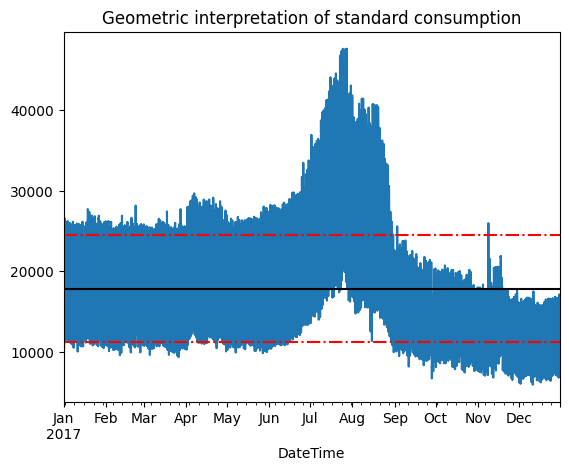

In [52]:
data2['Zone_3__Power_Consumption'].plot()
calculated_mean = data2['Zone_3__Power_Consumption'].mean()
plt.axhline(y=calculated_mean, color='black', linestyle='-')
plt.axhline(y=calculated_mean + data2['Zone_3__Power_Consumption'].std(), color='red', linestyle='-.')
plt.axhline(y=calculated_mean - data2['Zone_3__Power_Consumption'].std(), color='red', linestyle='-.')
plt.title('Geometric interpretation of standard consumption')

In [53]:
data2['class'] = np.where(abs(data2['Zone_3__Power_Consumption'] - calculated_mean) < data2['Zone_3__Power_Consumption'].std(), 1, 0)

## Colinearity detection

In [57]:
data2.drop('Zone_3__Power_Consumption', axis=1).corr()

,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,class
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,-0.110461
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,0.065919
Wind_Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,-0.118168
general_diffuse_flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.081173
diffuse_flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,0.161315
Zone_1_Power_Consumption,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,-0.202892
Zone_2__Power_Consumption,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,-0.285186
class,-0.110461,0.065919,-0.118168,0.081173,0.161315,-0.202892,-0.285186,1.000000


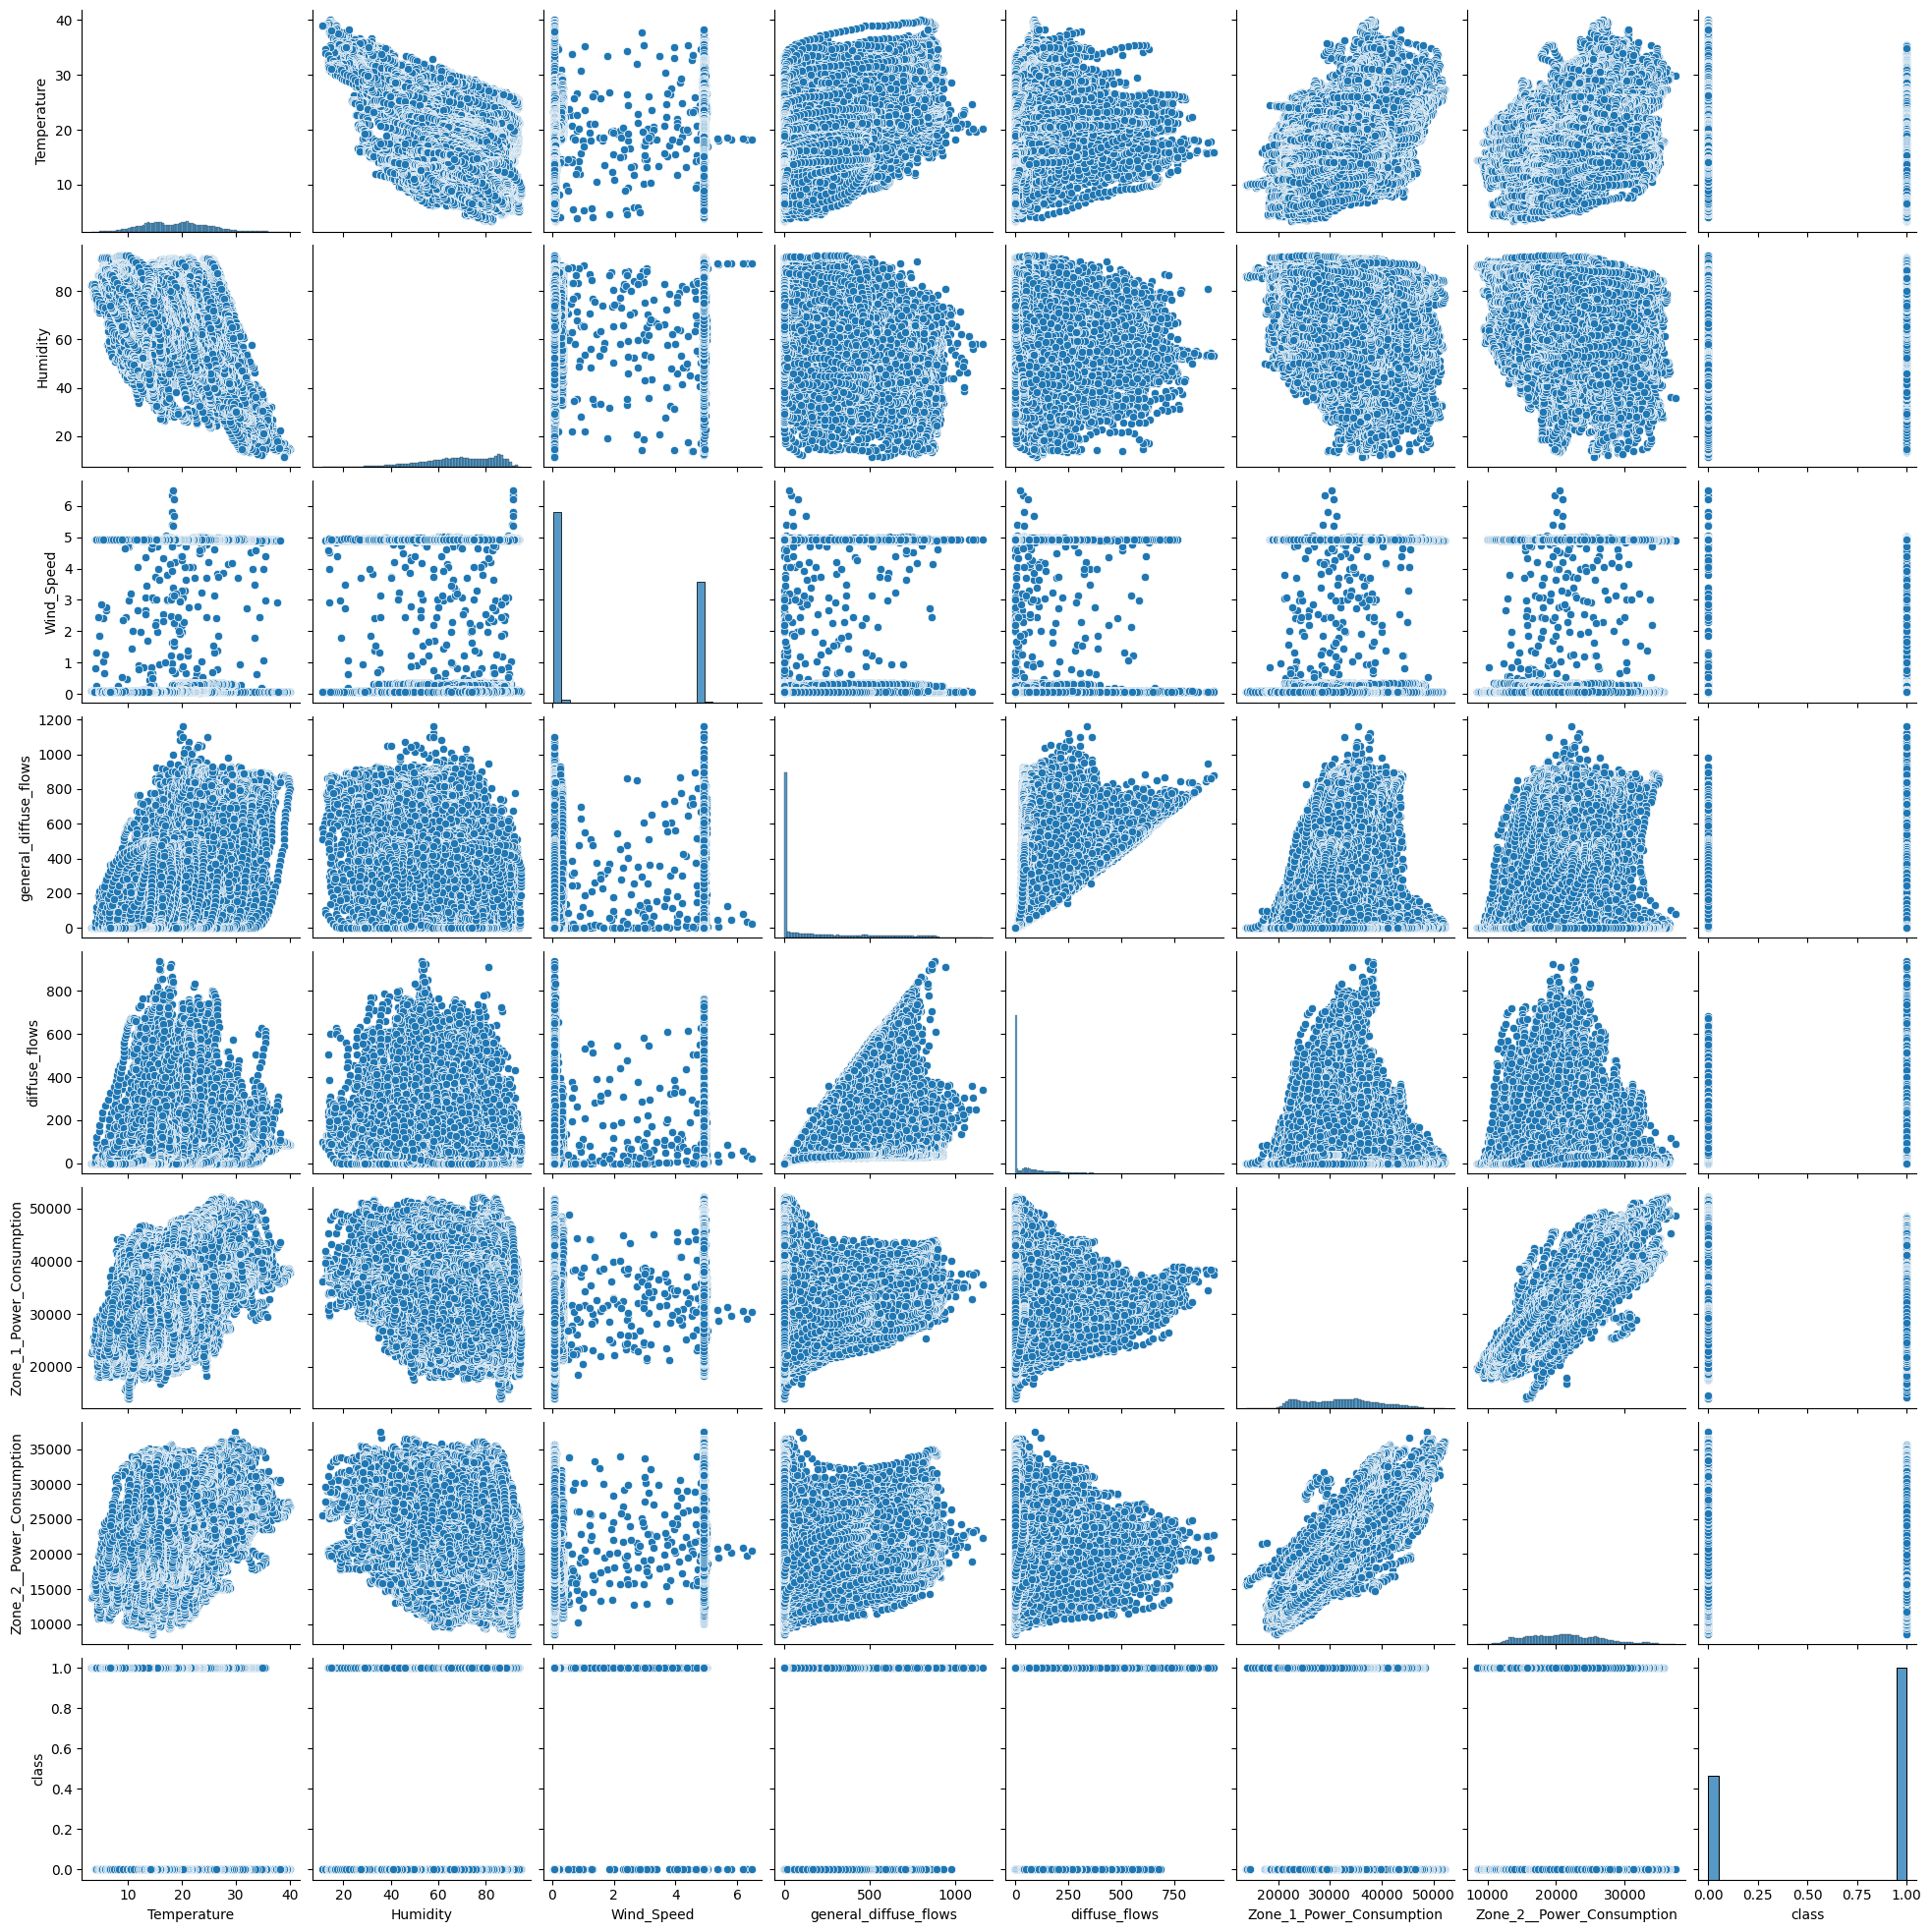

In [59]:
# Basic correlogram
sns.pairplot(data2.drop('Zone_3__Power_Consumption', axis=1))


In [62]:
p = Preprocessor()
vif_coefs = p.vif(data2.drop('Zone_3__Power_Consumption', axis=1))
vif_coefs[vif_coefs['VIF'] >= 7]

,variables,VIF
0,Temperature,19.951531
1,Humidity,11.313224
5,Zone_1_Power_Consumption,74.162929
6,Zone_2__Power_Consumption,58.577142
